In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import os

In [2]:
sns.set()
os.getcwd()

'D:\\Training_latent_view\\week3\\Graded_Assignment\\problem1'

In [3]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.shape

(440, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
df.isna().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [9]:
df.set_index(['Buyer/Spender'] , inplace = True)

In [10]:
df['sum'] = df['Fresh'] + df['Milk'] + df["Grocery"] + df['Frozen'] + df['Detergents_Paper'] + df['Delicatessen']

In [11]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,sum
Buyer/Spender,,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338,34112
2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


<AxesSubplot:xlabel='Region,Channel'>

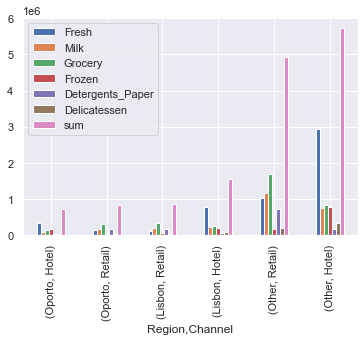

In [12]:
group_df = df.groupby(["Region" ,"Channel"])
group_df.sum().sort_values( by = ['sum'],ascending = True).plot.bar()

In [13]:
group_df_channel = df.groupby(['Channel']).sum()
group_df_channel.sort_values(by = ['sum'] , ascending = True)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,sum
Channel,,,,,,,
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569


In [14]:
group_df_region = df.groupby(['Region']).sum()
group_df_region.sort_values(by = ['sum'], ascending = True)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,sum
Region,,,,,,,
Oporto,464721,239144,433274,190132,173311,54506,1555088
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Other,3960577,1888759,2495251,930492,890410,512110,10677599


<AxesSubplot:xlabel='Channel', ylabel='Fresh'>

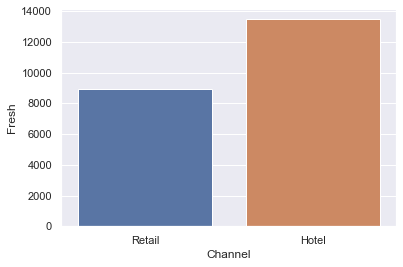

In [58]:
sns.barplot(x = 'Channel' , y ='Fresh',data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Milk'>

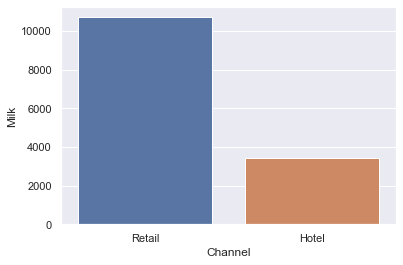

In [16]:
sns.barplot(x = 'Channel' , y ='Milk',data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Grocery'>

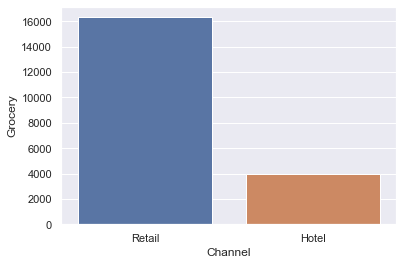

In [17]:
sns.barplot(x = 'Channel' , y ='Grocery',data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Frozen'>

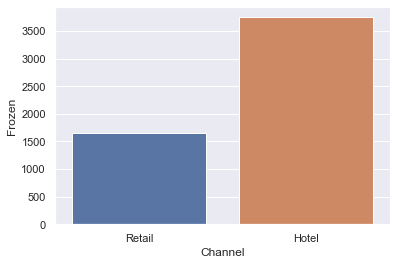

In [18]:
sns.barplot(x = 'Channel' , y ='Frozen',data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Detergents_Paper'>

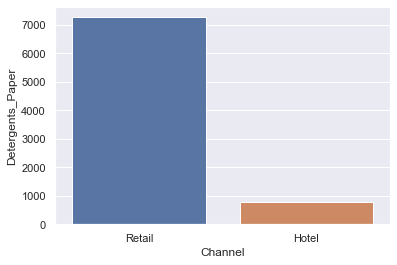

In [19]:
sns.barplot(x = 'Channel' , y ='Detergents_Paper',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='sum'>

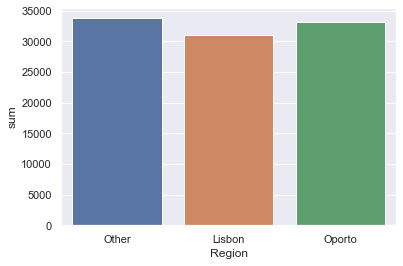

In [56]:
sns.barplot(x = 'Region' , y ='sum',data = df ,ci = None)

<AxesSubplot:xlabel='Channel', ylabel='Delicatessen'>

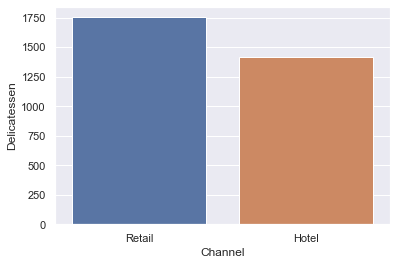

In [20]:
sns.barplot(x = 'Channel' , y ='Delicatessen',data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Fresh'>

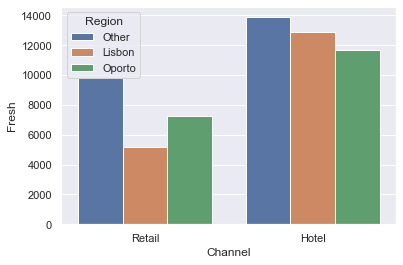

In [21]:
sns.barplot(x = 'Channel' , y ='Fresh', hue = 'Region' ,data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Milk'>

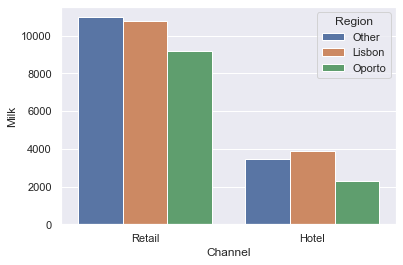

In [22]:
sns.barplot(x = 'Channel' , y ='Milk', hue = 'Region' ,data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Grocery'>

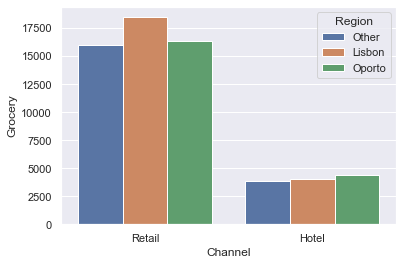

In [23]:
sns.barplot(x = 'Channel' , y ='Grocery', hue = 'Region' ,data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Frozen'>

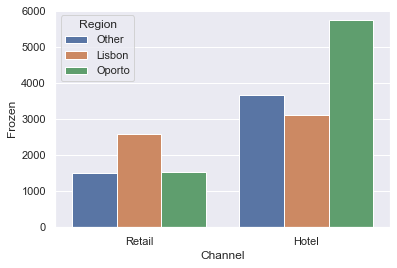

In [24]:
sns.barplot(x = 'Channel' , y ='Frozen', hue = 'Region' ,data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Detergents_Paper'>

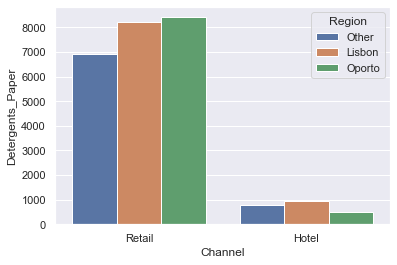

In [25]:
sns.barplot(x = 'Channel' , y ='Detergents_Paper', hue = 'Region' ,data = df ,ci = None )

<AxesSubplot:xlabel='Channel', ylabel='Delicatessen'>

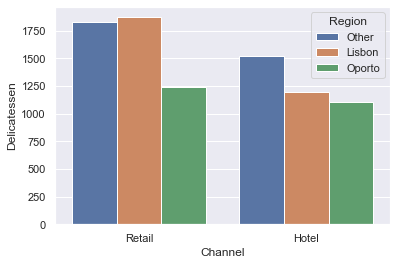

In [26]:
sns.barplot(x = 'Channel' , y ='Delicatessen', hue = 'Region' ,data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Fresh'>

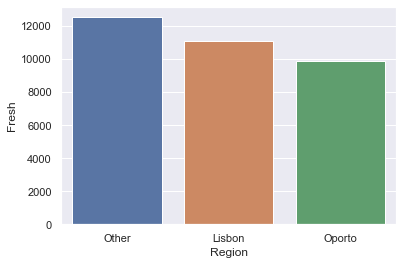

In [27]:
sns.barplot(x = 'Region' , y ='Fresh',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Grocery'>

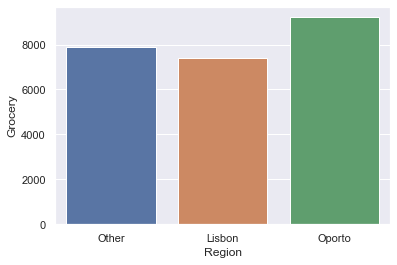

In [59]:
sns.barplot(x = 'Region' , y ='Grocery',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Milk'>

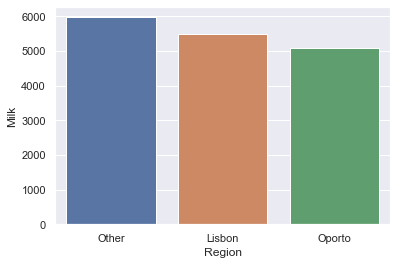

In [29]:
sns.barplot(x = 'Region' , y ='Milk',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Grocery'>

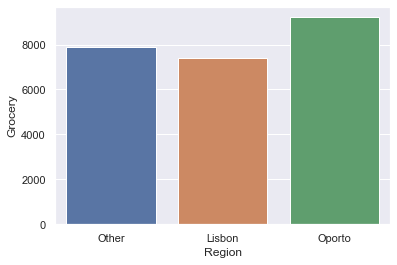

In [30]:
sns.barplot(x = 'Region' , y ='Grocery',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Frozen'>

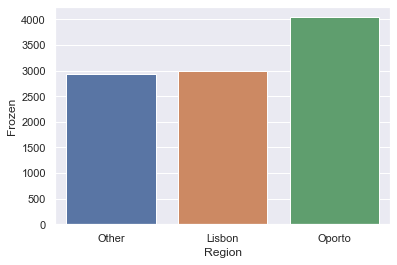

In [31]:
sns.barplot(x = 'Region' , y ='Frozen',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

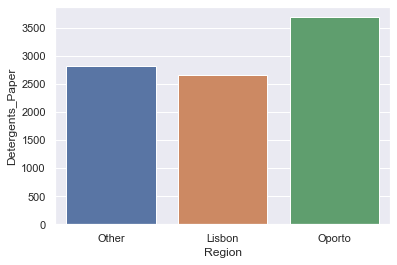

In [32]:
sns.barplot(x = 'Region' , y ='Detergents_Paper',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

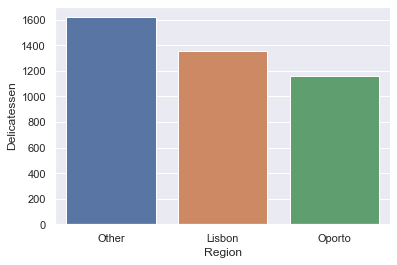

In [33]:
sns.barplot(x = 'Region' , y ='Delicatessen',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Fresh'>

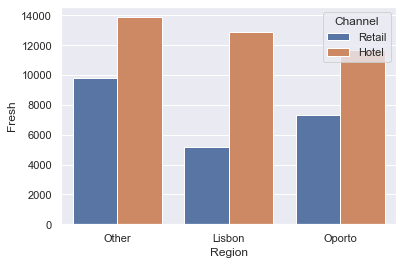

In [34]:
sns.barplot(x = 'Region' , y ='Fresh', hue = 'Channel',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Milk'>

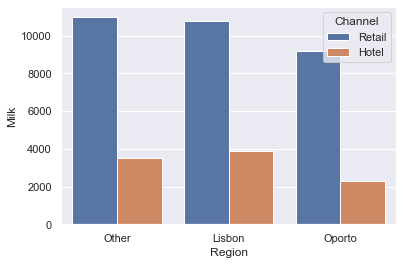

In [35]:
sns.barplot(x = 'Region' , y ='Milk', hue = 'Channel',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Grocery'>

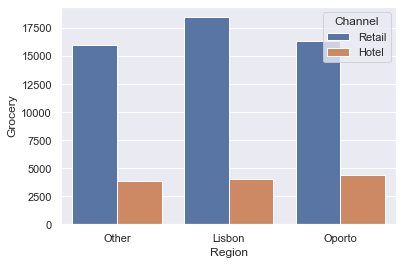

In [36]:
sns.barplot(x = 'Region' , y ='Grocery', hue = 'Channel',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Frozen'>

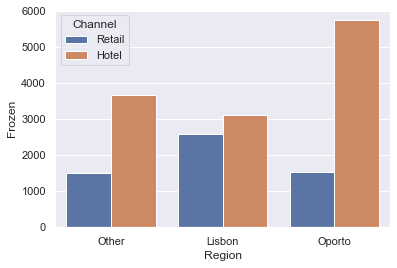

In [37]:
sns.barplot(x = 'Region' , y ='Frozen', hue = 'Channel',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

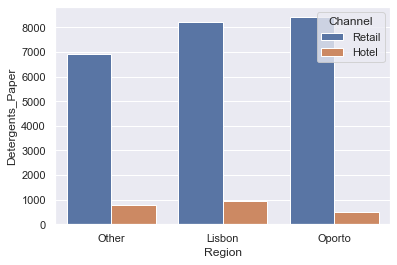

In [38]:
sns.barplot(x = 'Region' , y ='Detergents_Paper', hue = 'Channel',data = df ,ci = None )

<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

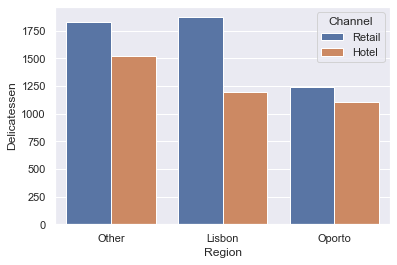

In [39]:
sns.barplot(x = 'Region' , y ='Delicatessen', hue = 'Channel',data = df ,ci = None )

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
sum,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [41]:
df.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
sum                 33226.136364
dtype: float64

In [42]:
df.var()

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
sum                 6.946546e+08
dtype: float64

In [43]:
cov = df.std()/df.mean()
cov

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
sum                 0.793240
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

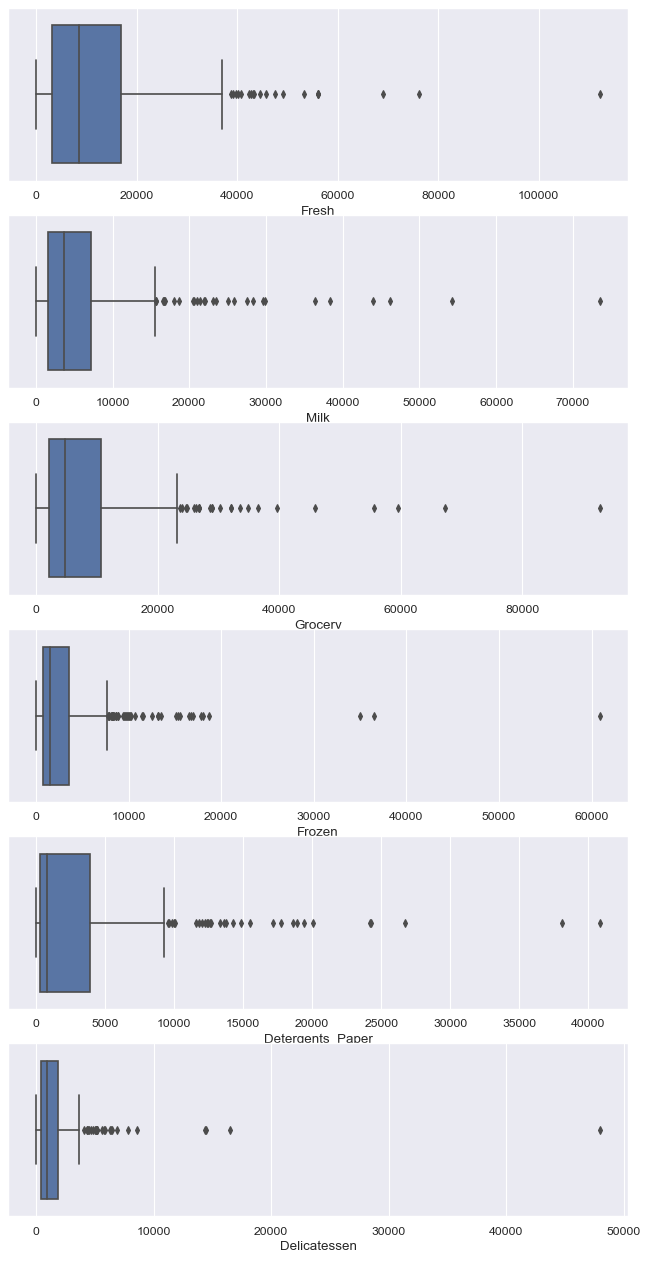

In [44]:
plt.figure(figsize= (10,20) , dpi = 80)
plt.subplot(6,1,1)
sns.boxplot(x = df['Fresh'])

plt.subplot(6,1,2)
sns.boxplot(x = df['Milk'])

plt.subplot(6,1,3)
sns.boxplot(x = df['Grocery'])

plt.subplot(6,1,4)
sns.boxplot(x = df['Frozen'])

plt.subplot(6,1,5)
sns.boxplot(x = df['Detergents_Paper'])

plt.subplot(6,1,6)
sns.boxplot(x = df['Delicatessen'])
plt.show

<AxesSubplot:>

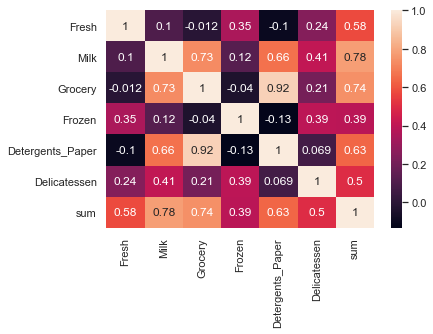

In [45]:
sns.heatmap(df.corr(),annot = True)

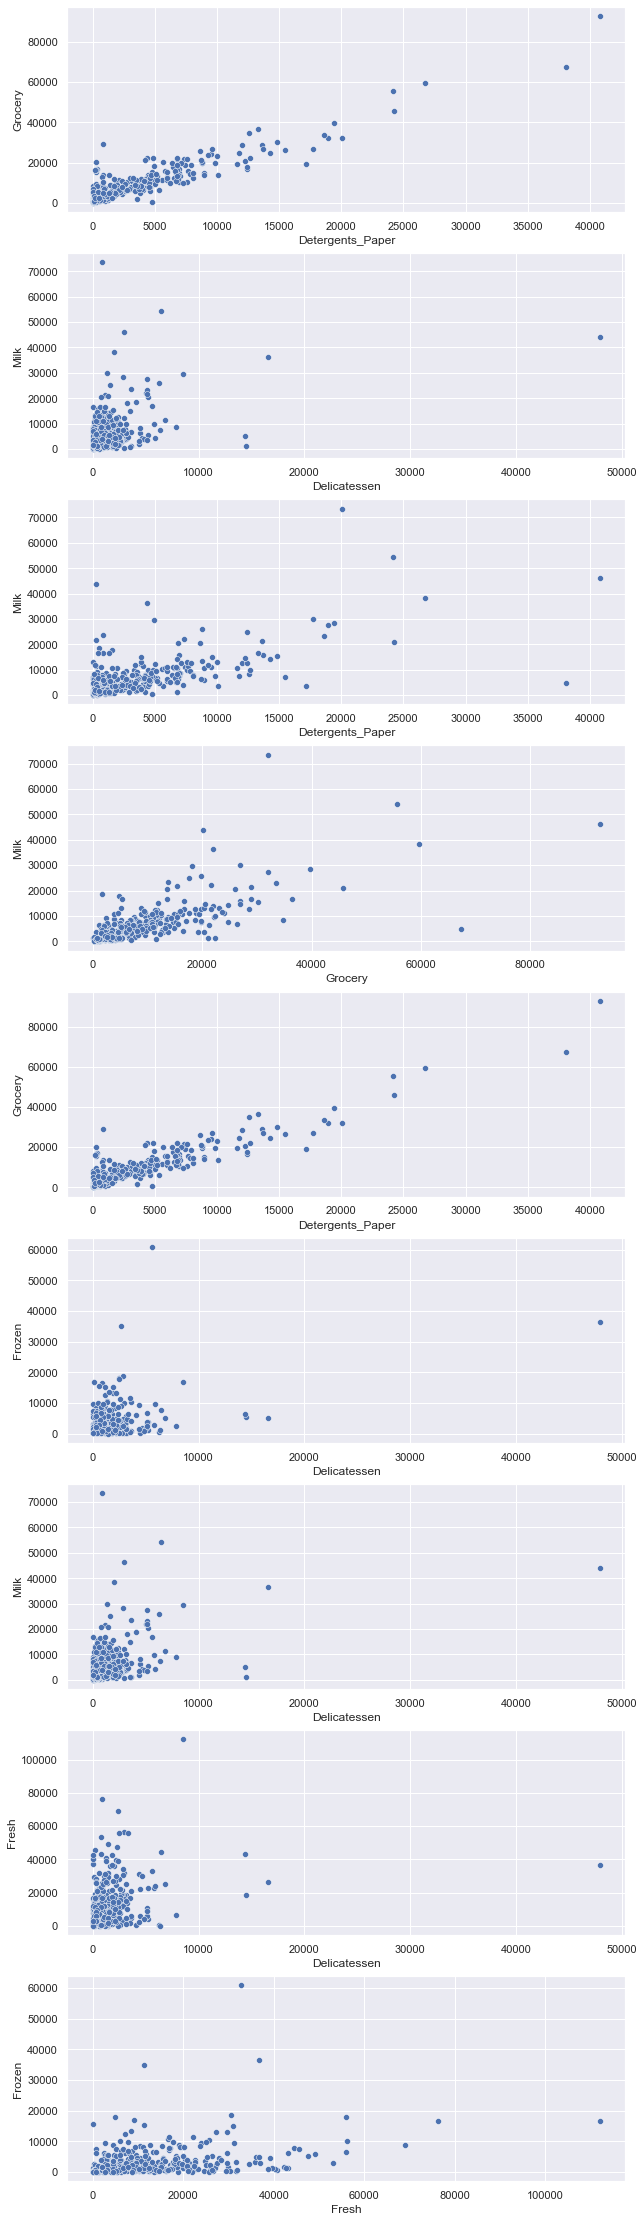

In [46]:
plt.figure(figsize = (10,40))
plt.subplot(9,1,1)
sns.scatterplot(x = 'Detergents_Paper' , y = 'Grocery', data = df)
plt.subplot(9,1,2)
sns.scatterplot(x = 'Delicatessen' , y = 'Milk', data = df)
plt.subplot(9,1,3)
sns.scatterplot(x = 'Detergents_Paper' , y = 'Milk', data = df)
plt.subplot(9,1,4)
sns.scatterplot(x = 'Grocery' , y = 'Milk', data = df)
plt.subplot(9,1,5)
sns.scatterplot(x = 'Detergents_Paper' , y = 'Grocery', data = df)
plt.subplot(9,1,6)
sns.scatterplot(x = 'Delicatessen' , y = 'Frozen', data = df)
plt.subplot(9,1,7)
sns.scatterplot(x = 'Delicatessen' , y = 'Milk', data = df)
plt.subplot(9,1,8)
sns.scatterplot(x = 'Delicatessen' , y = 'Fresh', data = df)
plt.subplot(9,1,9)
sns.scatterplot(x = 'Fresh' , y = 'Frozen', data = df)
plt.show()